In [1]:
%matplotlib inline
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from url import URL
from pymongo import *
import statistics as stat
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from time import strptime, mktime
import gc
import sys
import re
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
gc.collect()

client = MongoClient(URL)
db = client.crypto_wallet

In [2]:
def checkLen(a, b):
    if len(a) == len(b):
        return True
    else:
        return f'DB Objs:{len(a)} < Clean Arr Items:{len(b)}' if len(a) < len(b) else f'Clean Arr Items:{len(b)} < DB Objs:{len(a)}'

In [3]:
def p(o):
    return print(o)

In [4]:
def filterData(coll, st, narr):
    for obj in coll:
        try:
            tmp = obj.get(st)
            narr.append(tmp)
        except Exception as e:
            print(e, o['_id'])
    return narr

In [5]:
def datetime_converter(dtstr):
    tmstmp = strptime(dtstr, '%Y-%m-%d %H:%M:%S')
    epoch = mktime(tmstmp)
    return int(epoch)

In [6]:
BTC_Tickers_Collection = db.BTC_Tickers
BTC_Tickers_Objs = list(BTC_Tickers_Collection.find())
BTC_epochs = []
BTC_prices = []
BTC_volumes = []
BTC_highs = []
BTC_lows = []
for obj in BTC_Tickers_Collection.find():
    dt = re.sub(r'\..*', '', obj.get('time')).replace('T', ' ').rstrip('Z')
    BTC_epochs.append(datetime_converter(dt))
    BTC_prices.append(float(obj.get('price')))
    BTC_volumes.append(obj.get('volume'))
    BTC_highs.append(obj.get('ask'))
    BTC_lows.append(obj.get('bid'))

In [322]:
for i,e in enumerate(BTC_epochs):
    if i == 0:
        pass
    else:
        BTC_epochs[i] = BTC_epochs[i-1]+ 60

In [102]:
def trim(string):
    print(string)
    trimmed = ''
    arr = string.split()
    for i,c in enumerate(arr):
        while(c[0] == ' '):
            arr[i] = arr[i+1]
    for j in range(len(arr)):
        trimmed += arr[j] + ' '
    return trimmed

In [104]:
print(trim('   Hello     World   '))

   Hello     World   
Hello World 


In [303]:
def trim3(string):
    stack = []
    print(string)
    trimmed = ''
    for i,c in enumerate(string):
        if(c != ' '):
            first = i
            break
    for i,c in enumerate(string[first:]):
        stack.append(c)
    a = len(stack) - 1
    while(stack[a] == ' '):
        stack.pop(a)
        a -= 1
    for i in stack:
        trimmed += i
    return trimmed

In [304]:
print(trim3('   Hello     World    '))

   Hello     World    
Hello     World


In [323]:
p(checkLen(BTC_Tickers_Objs, BTC_prices))
p(checkLen(BTC_epochs, BTC_prices))
p(checkLen(BTC_Tickers_Objs, BTC_volumes))
p(checkLen(BTC_Tickers_Objs, BTC_highs))
p(checkLen(BTC_Tickers_Objs, BTC_lows))

True
True
True
True
True


In [324]:
BTC_RSI_Collection = db.BTC_RSI14_Data
BTC_RSI_Objs = list(BTC_RSI_Collection.find())
BTC_RSIs = []
Errors = []
for rsio in BTC_RSI_Collection.find():
    RSI = rsio.get('RSI')
    try:
        if type(RSI) == float:
            BTC_RSIs.append(int(RSI))
        elif type(RSI) == list:
            if RSI[0] == None:
                pass
            else:
                BTC_RSIs.append(int(stat.mean(RSI)))
        else:
            BTC_RSIs.append(RSI)
    except Exception as e:
        Errors.append(rsio['_id'])
        print(e, rsio['_id'])
        sys.exit(1)

In [325]:
if len(Errors) > 0:
    print(Errors)

In [326]:
p(checkLen(BTC_RSI_Objs, BTC_RSIs))

Clean Arr Items:133996 < DB Objs:136613


In [327]:
BTC_ADL_Collection = db.BTC_ADL_Data
BTC_ADL_Objs = list(BTC_ADL_Collection.find())
BTC_ADLs = []
BTC_ADL_slope = []
for o in BTC_ADL_Collection.find():
    ADL = o.get('ADL')
    slope = o.get('slope')
    try:
        if type(ADL) == float:
            BTC_ADLs.append(int(ADL))
        elif type(ADL) == list:
            BTC_ADLs.append(int(stat.mean(ADL)))
        else:
            BTC_ADLs.append(ADL)
        if type(slope) == int:
            BTC_ADL_slope.append(float(slope))
        elif type(slope) == list:
            BTC_ADL_slope.append(int(stat.mean(slope)))
        else:
            BTC_ADL_slope.append(slope)
    except Exception as e:
        print(e, o['_id'])
        sys.exit(1)

In [328]:
p(checkLen(BTC_ADL_Objs, BTC_ADLs))

p(checkLen(BTC_ADL_slope, BTC_ADLs))

True
True


In [329]:
BTC_OBV_Collection = db.BTC_OBV_Data
BTC_OBV_Objs = list(BTC_OBV_Collection.find())
BTC_OBVs = []
BTC_OBV_slope = []
for o in BTC_OBV_Collection.find():
    OBV = o.get('OBV')
    slope = o.get('slope')
    try:
        if type(OBV) == float:
            BTC_OBVs.append(int(OBV))
        elif type(OBV) == list:
            BTC_OBVs.append(int(stat.mean(OBV)))
        else:
            BTC_OBVs.append(ADL)
        if type(slope) == int:
            BTC_OBV_slope.append(float(slope))
        elif type(slope) == list:
            BTC_ADL_slope.append(int(stat.mean(slope)))
        else:
            BTC_OBV_slope.append(slope)
    except Exception as e:
        print(e, o['_id'])
        sys.exit(1)

In [330]:
p(checkLen(BTC_OBV_Objs, BTC_OBVs))
p(checkLen(BTC_OBV_slope, BTC_OBVs))

True
True


In [331]:
print(f'datetime: {len(BTC_epochs)}\nprices: {len(BTC_prices)}')
collection_lengths = [len(BTC_volumes), len(BTC_highs), len(BTC_lows), len(BTC_ADLs), len(BTC_ADL_slope), len(BTC_OBVs), len(BTC_OBV_slope)]
print(f'Volumes: {len(BTC_RSIs)}\nHighs: {len(BTC_RSIs)}\nLows: {len(BTC_RSIs)}\nRSI: {len(BTC_RSIs)}\nADL_slp: {len(BTC_ADL_slope)}\nOBV_slp: {len(BTC_OBV_slope)}')

datetime: 142680
prices: 142680
Volumes: 133996
Highs: 133996
Lows: 133996
RSI: 133996
ADL_slp: 98530
OBV_slp: 98543


In [332]:
min = collection_lengths[0]
for i in range(1, len(collection_lengths)):
    if collection_lengths[i] < min:
        min = collection_lengths[i]

In [341]:
# BTC_Data = { 'Datetime': BTC_dt_epochs[0:min], 'Prices': BTC_prices[0:min], 'High': BTC_highs[0:min], 'Low': BTC_lows[0:min] }

BTC_Data = { 'Datetime': BTC_epochs[0:min], 
             'Prices': BTC_prices[0:min], 
             'Volumes':BTC_volumes[0:min],
             'High':BTC_highs[0:min], 
             'Low':BTC_lows[0:min],
             'RSI': BTC_RSIs[0:min],
             'ADL' : BTC_ADLs[0:min],
             'ADL_slope': BTC_ADL_slope[0:min],
             'OBV' : BTC_OBVs[0:min],
             'OBV_slope': BTC_OBV_slope[0:min] }

In [342]:
keys = BTC_Data.keys()
for k in keys:
    print(f'{k}: {len(BTC_Data[k])}')

Datetime: 98530
Prices: 98530
Volumes: 98530
High: 98530
Low: 98530
RSI: 98530
ADL: 98530
ADL_slope: 98530
OBV: 98530
OBV_slope: 98530


In [343]:
BTC_df = pd.DataFrame(BTC_Data)
BTC_df.head()

,Datetime,Prices,Volumes,High,Low,RSI,ADL,ADL_slope,OBV,OBV_slope
0,1560575342,8644.08,13197.70190687,8644.86,8640.43,15.0,5203,-0.092510,8,-0.000454
1,1560575402,8644.08,13197.70190687,8644.87,8640.5,15.0,10443,2.008249,5130,-0.092510
2,1560575462,8646.01,13197.70190687,8646.01,8646,10.0,16145,1.985836,-5706,0.010063
3,1560575522,8646.01,13200.91076417,8646.01,8646,9.0,9647,6.193095,5378,-0.003326
4,1560575582,8635.99,13200.91076417,8635.37,8634.36,9.0,-4861,0.818087,10819,2.000370


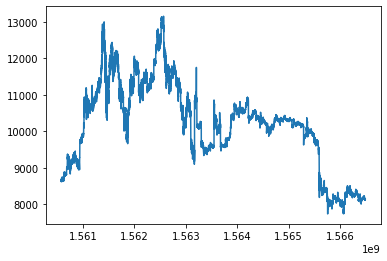

In [344]:
x = BTC_df.Datetime
y = BTC_df.Prices
plt.plot(x, y)
plt.show()

In [345]:
BTC_df['High'] = BTC_df.High.astype('float64')
BTC_df['Low'] = BTC_df.Low.astype('float64')
BTC_df['Volumes'] = BTC_df.Volumes.astype('float64')

In [346]:
ADL_avg = BTC_df.ADL.mean()
RSI_avg = BTC_df.RSI.mean()
ADL_slp_avg = BTC_df.ADL_slope.mean()
OBV_slp_avg = BTC_df.OBV_slope.mean()

In [347]:
values = {'OBV_slope': OBV_slp_avg, 'RSI': RSI_avg }
BTC_df = BTC_df.fillna(value=values)
BTC_df.head()

,Datetime,Prices,Volumes,High,Low,RSI,ADL,ADL_slope,OBV,OBV_slope
0,1560575342,8644.08,13197.701907,8644.86,8640.43,15.0,5203,-0.092510,8,-0.000454
1,1560575402,8644.08,13197.701907,8644.87,8640.50,15.0,10443,2.008249,5130,-0.092510
2,1560575462,8646.01,13197.701907,8646.01,8646.00,10.0,16145,1.985836,-5706,0.010063
3,1560575522,8646.01,13200.910764,8646.01,8646.00,9.0,9647,6.193095,5378,-0.003326
4,1560575582,8635.99,13200.910764,8635.37,8634.36,9.0,-4861,0.818087,10819,2.000370


In [348]:
BTC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98530 entries, 0 to 98529
Data columns (total 10 columns):
Datetime     98530 non-null int64
Prices       98530 non-null float64
Volumes      98530 non-null float64
High         98530 non-null float64
Low          98530 non-null float64
RSI          98530 non-null float64
ADL          98530 non-null int64
ADL_slope    98530 non-null float64
OBV          98530 non-null int64
OBV_slope    98530 non-null float64
dtypes: float64(7), int64(3)
memory usage: 7.5 MB


In [349]:
np.random.seed(42)

In [384]:
X = BTC_df.drop('Prices', axis=1)
y = BTC_df['Prices']
print(X.shape)
print(y.shape)

(98530, 9)
(98530,)


In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

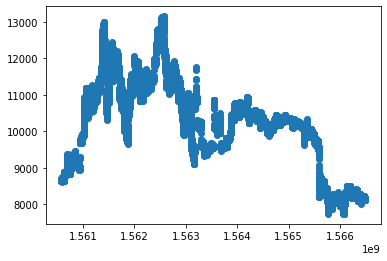

In [386]:
plt.scatter(X_train.Datetime, y_train)
plt.show()

In [387]:
scalar = MinMaxScaler(feature_range=(0, 1))
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [388]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],  1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],  1))

In [389]:
model = Sequential()

#input layer
model.add(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

#hidden layer
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))

# #hidden layer
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))

# #hidden layer
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))

# #hidden layer
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))

# hidden layer
model.add(LSTM(200))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1))

In [346]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mape'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 50)            

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, shuffle=True, batch_size=1)

In [ ]:
model_loss = model.evaluate(X_test, y_test, verbose=0) #verbose=0
print(f"\n{model_loss} = {round(model_loss)}")